In [2]:
# Some of the fields in the csv have been written with commas
# That has to be corrected. The bad lines have a comma too many
badfile = open("export.csv")
fixedfile = open("fixed.csv", "w")
for idx,line in enumerate(badfile):
    # Remove the trailing comma.
    # It causes misreading of the column names.
    line = line.rstrip()
    line = line.rstrip(',')
    if idx == 0:
        line = line.replace(',"LOADINFORMATION_LI_ID"','')
    # remove third column
    line=line.replace(',000000000','')
    if line.count(",") > 10:
        # Fix the line. Read in and split in fields.
        fields = line.split(',')
        # The 6th/7th column contain the integer and fraction of a float
        # Pop the fraction part out of the list and combine parts 
        # but by removing the third column these become 5th/6th
        fields[4] = ".".join([fields[4],fields.pop(5)])
        print(",".join(fields), file=fixedfile)
    else:
        # Write the line to the outputfile as is
        print(line, file=fixedfile)
# Done reading and writing - closing files
badfile.close()
fixedfile.close()

# Deelopdracht 1: 
Zet een Jupyter Python3 notebook op dat gebruikt kan worden voor alle opdrachten met numpy, pandas en matplotlib. Voeg de hierboven gegeven code in en zorg dat het originele bestand ingelezen kan worden en gecorrigeerd wegeschreven kan. Lees dan het gecorrigeerde bestand in als Pandas dataframe. Zet de waardes van de kolom “M_DATE” om naar datetime (pandas datum type) en verwijder dubbel geregistreerde tijden (drop duplicate times).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import matplotlib
import seaborn as sns

%matplotlib inline
from datetime import datetime
from datetime import date

In [4]:
# Formaat van datum meegeven voor parse_dates, dan is de bewerking sneller
mets_df = pd.read_csv("fixed.csv",parse_dates=['M_DATE'],date_parser=lambda x: datetime.strptime(x, '%d-%m-%y %H:%M:%S')).drop_duplicates('M_DATE')

In [5]:
len(mets_df)

329773

In [6]:
mets_df.head()

,M_ID,M_DATE,M_CALORIES,M_STEPS,M_DISTANCE,M_METS,M_WEEK,M_WEEKDAY,M_HOUR,M_MINUTE,PERSONDEVICES_PD_USER__ID
0,27,2016-01-24 00:00:00,1,0,0.0,10,3,1,0,0,3
1,28,2016-01-24 00:01:00,1,0,0.0,10,3,1,0,1,3
2,29,2016-01-24 00:02:00,1,0,0.0,10,3,1,0,2,3
3,30,2016-01-24 00:03:00,1,0,0.0,10,3,1,0,3,3
4,31,2016-01-24 00:04:00,1,0,0.0,10,3,1,0,4,3


In [7]:
type(mets_df)

pandas.core.frame.DataFrame

In [8]:
mets_df.columns

Index(['M_ID', 'M_DATE', 'M_CALORIES', 'M_STEPS', 'M_DISTANCE', 'M_METS',
       'M_WEEK', 'M_WEEKDAY', 'M_HOUR', 'M_MINUTE',
       'PERSONDEVICES_PD_USER__ID'],
      dtype='object')

In [9]:
mets_df.describe()

,M_ID,M_CALORIES,M_STEPS,M_DISTANCE,M_METS,M_WEEK,M_WEEKDAY,M_HOUR,M_MINUTE,PERSONDEVICES_PD_USER__ID
count,329773.000000,329773.000000,329773.000000,329773.000000,329773.000000,329773.000000,329773.0,329773.000000,329773.000000,329773.0
mean,198138.814251,1.534001,6.718397,0.005318,15.027483,19.716799,1.0,11.499547,29.499074,3.0
std,117349.101178,1.703497,22.751676,0.019345,14.293814,9.449521,0.0,6.922437,17.318432,0.0
min,27.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.0,0.000000,0.000000,3.0
25%,85350.000000,1.000000,0.000000,0.000000,10.000000,12.000000,1.0,5.000000,14.000000,3.0
50%,199517.000000,1.000000,0.000000,0.000000,10.000000,20.000000,1.0,11.000000,29.000000,3.0
75%,302909.000000,1.000000,0.000000,0.000000,12.000000,28.000000,1.0,17.000000,44.000000,3.0
max,385374.000000,15.000000,179.000000,0.172650,129.000000,36.000000,1.0,23.000000,59.000000,3.0


# Deelopdracht 2: 
Bereken het aantal stappen per dag, per week en per maand en laat deze zien als afzonderlijke lijn grafieken. Bereken daarnaast het gemiddelde per dag van de week en print de resultaten als staafdiagram. Beschrijf in het notebook wat de data en de grafieken laten zien.

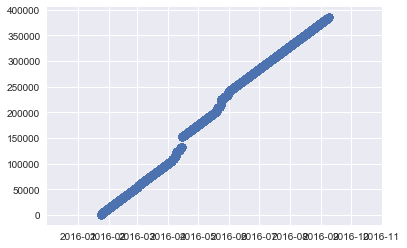

In [10]:
pl.scatter(mets_df['M_DATE'].values,mets_df['M_ID'])

In [11]:
mets_df['datum'] = mets_df['M_DATE'].dt.date 
mets_df['weekdag'] = mets_df['M_DATE'].dt.dayofweek #0 is monday
mets_df['maand'] = mets_df['M_DATE'].dt.month
mets_df['week'] = mets_df['M_DATE'].dt.week

In [12]:
dag_mets_df=mets_df.groupby(['datum']).sum()['M_STEPS'].reset_index()

In [13]:
weekdag_mets_df=mets_df.groupby(['weekdag']).sum()['M_STEPS'].reset_index()

In [14]:
week_mets_df=mets_df.groupby(['week']).sum()['M_STEPS'].reset_index()

In [15]:
maand_mets_df=mets_df.groupby(['maand']).sum()['M_STEPS'].reset_index()

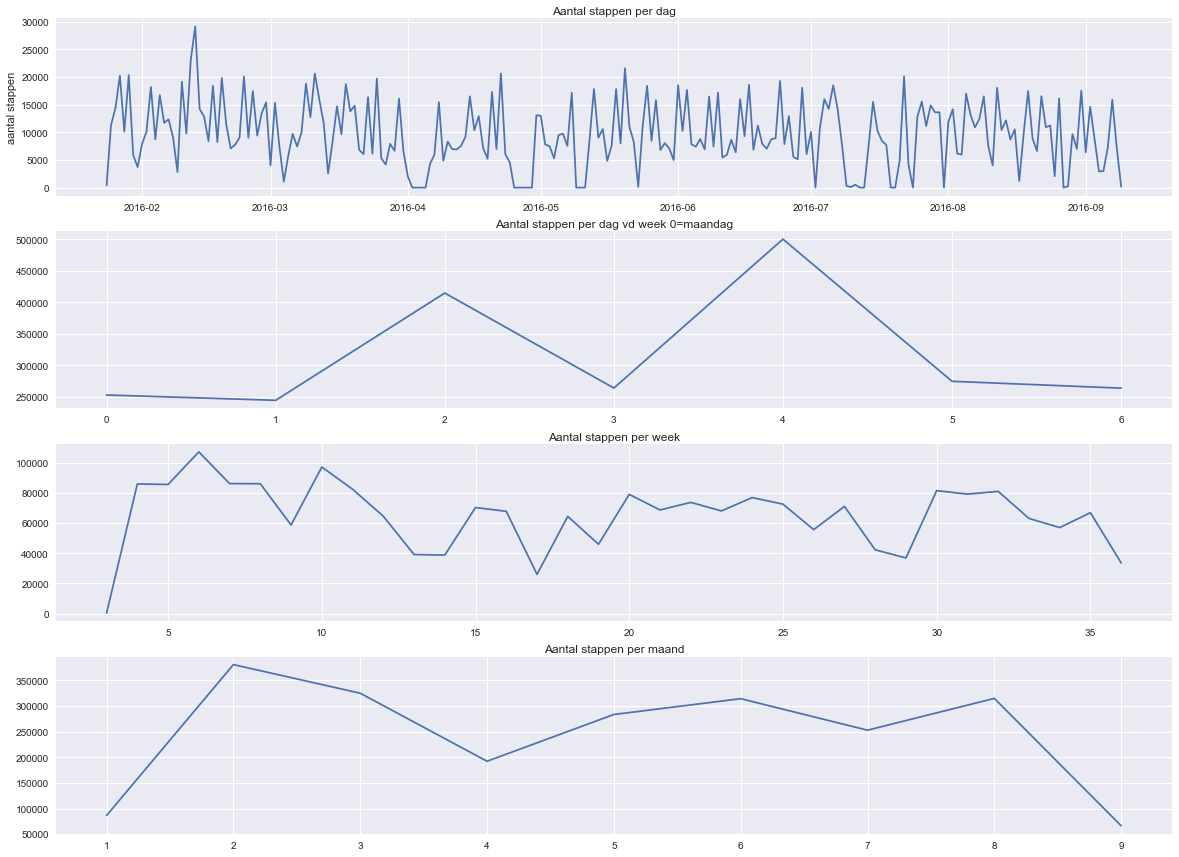

In [16]:
### maak er een plot van.
stepsPlots = pl.figure(figsize=(20,15))

pl.subplot(4,1,1)
pl.plot(dag_mets_df['datum'],dag_mets_df['M_STEPS'])
pl.title('Aantal stappen per dag')
pl.ylabel('aantal stappen')

pl.subplot(4,1,2)
pl.plot(weekdag_mets_df['weekdag'],weekdag_mets_df['M_STEPS'])
pl.title('Aantal stappen per dag vd week 0=maandag')

pl.subplot(4,1,3)
pl.plot(week_mets_df['week'],week_mets_df['M_STEPS'])
pl.title('Aantal stappen per week')

pl.subplot(4,1,4)
pl.plot(maand_mets_df['maand'],maand_mets_df['M_STEPS'])
pl.title('Aantal stappen per maand')
pl.show()

In [17]:
### Gemiddeld aantal stappen per weekdag. Eerst weekdag toevoegen aan stappen per dag
dag_mets_df['weekdag'] = pd.to_datetime(dag_mets_df['datum']).dt.dayofweek #0 is monday

In [18]:
### en vervolgens het gemiddeld aantal stappen per weekdag.
weekdag_mean=dag_mets_df.groupby(['weekdag']).mean()['M_STEPS'].reset_index()
print(weekdag_mean)

   weekdag       M_STEPS
0        0   7667.515152
1        1   7411.878788
2        2  12571.454545
3        3   8001.848485
4        4  15161.696970
5        5   8586.500000
6        6   7997.060606


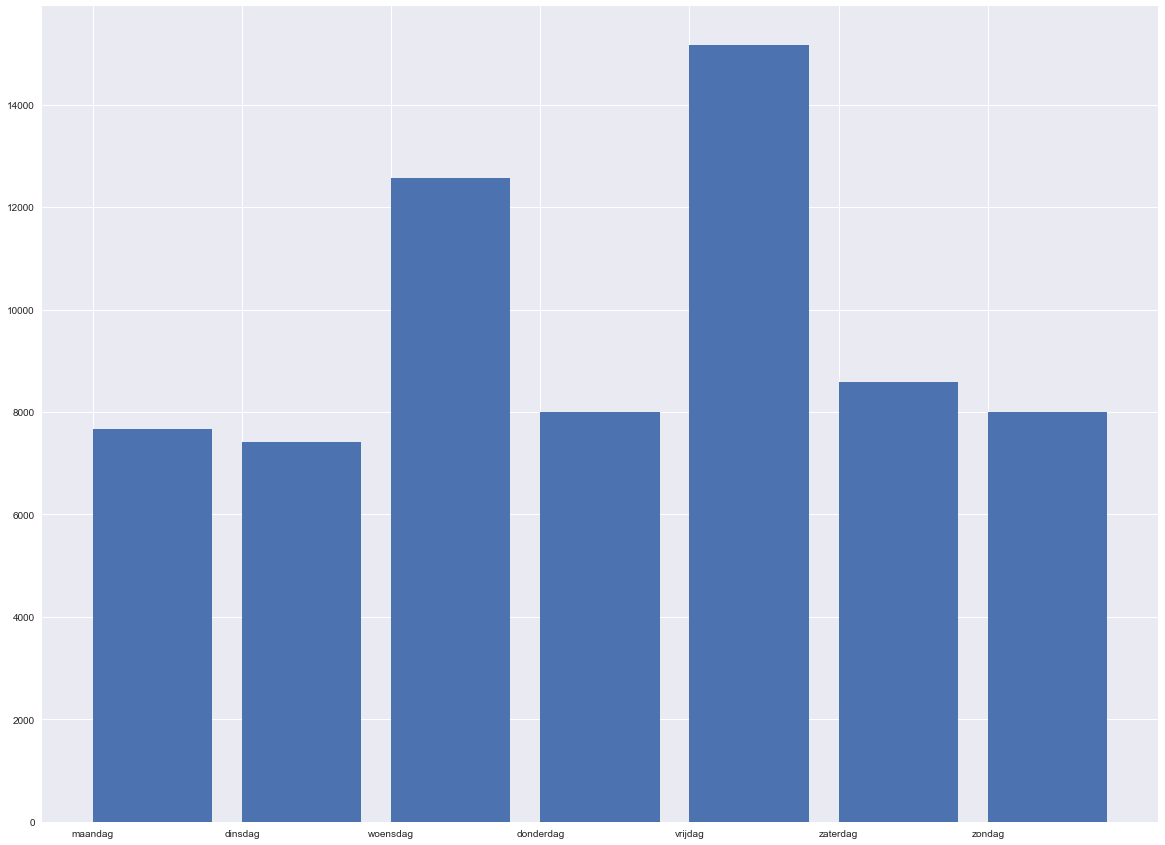

In [19]:
stepsPlots = pl.figure(figsize=(20,15))
pl.bar(weekdag_mean['weekdag'],weekdag_mean['M_STEPS'])
pl.xticks(np.arange(7),('maandag','dinsdag','woensdag','donderdag','vrijdag','zaterdag','zondag'))
pl.show()

## Waarnemingen:

* er zijn een aantal dagen/periodes waarop er geen registraties zijn.
* de meeste beweging vindt plaats op woensdag, vrijdag en zaterdag.
* op zondag, maandag en dinsdag is er sprake van weinig beweging.
* het aantal stappen per week fluctueert tussen ca. 17000 en 10000 stappen.
* na week 35 neemt het aantal stappen sterk af.
* gemiddelde per maand redelijk constant.
* na augustus neemt de beweging sterk af en in april is een dip.
* het stapgemiddelde is op vrijdag het hoogst, terwijl het totaal aantal stappen op zaterdag het hoogst is. Blijkbaar wordt niet op alle zaterdagen bewogen, maar als er wordt bewogen worden er veel stappen gemaakt.

# Deelopdracht 3: 
Om te kijken of er verschil is tussen de dagen van de week is het niet genoeg alleen naar de gemiddelden te kijken. Deze kunnen immers beinvloed worden door uitbijters. Geef de data per dag van de week weer als boxplots en als violinplots om inzicht te krijgen in de verdeling en beschrijf in het notebook wat de data en de grafieken laten zien, met name of er echt een verschil is tussen verschillende dagen.

In [20]:
weekdag_df=pd.pivot_table(mets_df,index=['week'],columns=['weekdag'],values=['M_STEPS'],aggfunc=np.sum)


In [21]:
weekdag_df

M_STEPS                                                      
weekdag        0        1        2        3        4        5        6
week                                                                  
3            NaN      NaN      NaN      NaN      NaN      NaN    410.0
4        11313.0  14376.0  20241.0  10111.0  20336.0   5904.0   3709.0
5         7868.0  10113.0  18197.0   8708.0  16722.0  11706.0  12337.0
6         9092.0   2817.0  19144.0   9767.0  23093.0  29133.0  14205.0
7        12870.0   8384.0  18385.0   8236.0  19814.0  11470.0   7081.0
8         7753.0   9015.0  20088.0   8997.0  17444.0   9402.0  13433.0
9        15410.0   4024.0  15321.0   7481.0   1077.0   5751.0   9711.0
10        7435.0   9985.0  18800.0  12736.0  20618.0  15985.0  11640.0
11        2558.0   8294.0  14707.0   9647.0  18722.0  13792.0  14795.0
12        6824.0   6054.0  16365.0   6142.0  19733.0   5314.0   4164.0
13        7907.0   6648.0  16097.0   6541.0   2019.0      0.0      0.0
14           0.0      0.0   4272.0   5965.0  15453.0   4846.0   8319.0
15        6959.0   6894.0   7536.0   9188.0  16492.0  10371.0  12915.0
16        7145.0   5208.0  17301.0   6967.0  20638.0   6029.0   4574.0
17           0.0      0.0      0.0      0.0      0.0  13065.0  12993.0
18        7802.0   7471.0   5291.0   9484.0   9760.0   7550.0  17141.0
19           0.0      0.0      0.0   8593.0  17821.0   9022.0  10584.0
20        4838.0   7587.0  17826.0   7991.0  21577.0  11037.0   8219.0
21         119.0  11096.0  18418.0   8449.0  15836.0   6790.0   8039.0
22        7086.0   4972.0  18535.0  10234.0  17672.0   7839.0   7416.0
23        8772.0   6910.0  16461.0   7428.0  17185.0   5432.0   5926.0
24        8644.0   6384.0  16000.0   9305.0  18572.0   6837.0  11213.0
25        7900.0   7020.0   8704.0   8925.0  19289.0   7843.0  12913.0
26        5566.0   5119.0  18062.0   6062.0  10080.0      0.0  10798.0
27       15976.0  14222.0  18480.0  14259.0   7732.0    300.0    113.0
28         511.0      0.0      0.0   7581.0  15507.0  10280.0   8457.0
29        7708.0     13.0      0.0   4901.0  20126.0   4170.0      0.0
30       12762.0  15558.0  11141.0  14870.0  13601.0  13613.0      0.0
31       11900.0  14167.0   6156.0   5977.0  16980.0  13188.0  10884.0
32       12414.0  16505.0   7522.0   4026.0  18052.0  10401.0  12148.0
33        8696.0  10518.0   1188.0   9781.0  17466.0   8917.0   6602.0
34       16528.0  10926.0  11205.0   2052.0  16110.0      0.0    234.0
35        9677.0   7007.0  17522.0   6380.0  14636.0   8781.0   2930.0
36        2995.0   7305.0  15893.0   7277.0    173.0      NaN      NaN

In [22]:
weekdag_df.columns

MultiIndex(levels=[['M_STEPS'], [0, 1, 2, 3, 4, 5, 6]],
           labels=[[0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6]],
           names=[None, 'weekdag'])

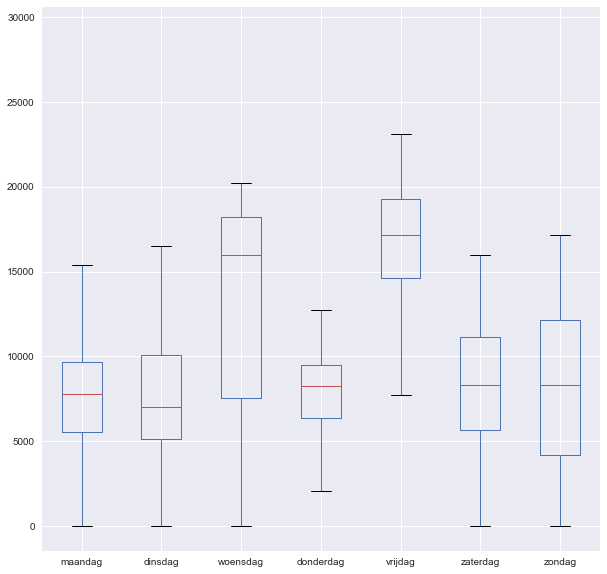

In [23]:
ax=weekdag_df.plot.box(figsize=(10,10))
ax.set_xticklabels(['maandag','dinsdag','woensdag','donderdag','vrijdag','zaterdag','zondag'])


C:\Python35\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


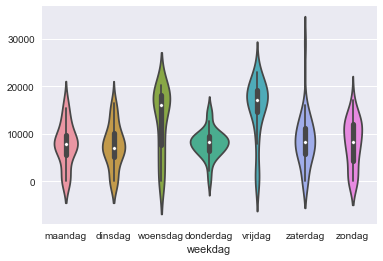

In [26]:
ax = sns.violinplot(weekdag_df['M_STEPS'],figsize=(10,10))
ax.set_xticklabels(['maandag','dinsdag','woensdag','donderdag','vrijdag','zaterdag','zondag'])

## Waarnemingen:
* brede verdeling stappen op woensdag en vrijdag
* alleen op maandag ligt gemiddelde ongeveer in het midden van de box (tussen q1 en q3)
* op vrijdag veel beweging (gemiddelde ligt hoog in de box, bij veel stappen.
* op woensdag weinig waarnemingen rond het gemiddelde en dus meer er onder en er boven. Overige dagen rond het gemiddelde.

# Deelopdracht 4: 
Bepaal met behulp van de MET waarde en de formule op https://nl.wikipedia.org/wiki/MET-waarde de cumulatieve hoeveelheid calorien die verbrand zijn in februari, in mei en in augustus. Toon de drie grafieken samen en kies onderscheidende kleuren en/of lijnen. Vergelijk de grafieken en beschrijf het verloop in het notebook.

In [27]:
# Februari
mets_feb=mets_df[mets_df['maand']==2]
cumsum_feb=mets_feb.groupby(['datum']).sum()['M_CALORIES'].reset_index()
cumsum_feb['cumsum']=cumsum_feb['M_CALORIES'].cumsum()

# Mei
mets_mei=mets_df[mets_df['maand']==5]
cumsum_mei=mets_mei.groupby(['datum']).sum()['M_CALORIES'].reset_index()
cumsum_mei['cumsum']=cumsum_mei['M_CALORIES'].cumsum()

# Augustus
mets_aug=mets_df[mets_df['maand']==8]
cumsum_aug=mets_aug.groupby(['datum']).sum()['M_CALORIES'].reset_index()
cumsum_aug['cumsum']=cumsum_aug['M_CALORIES'].cumsum()

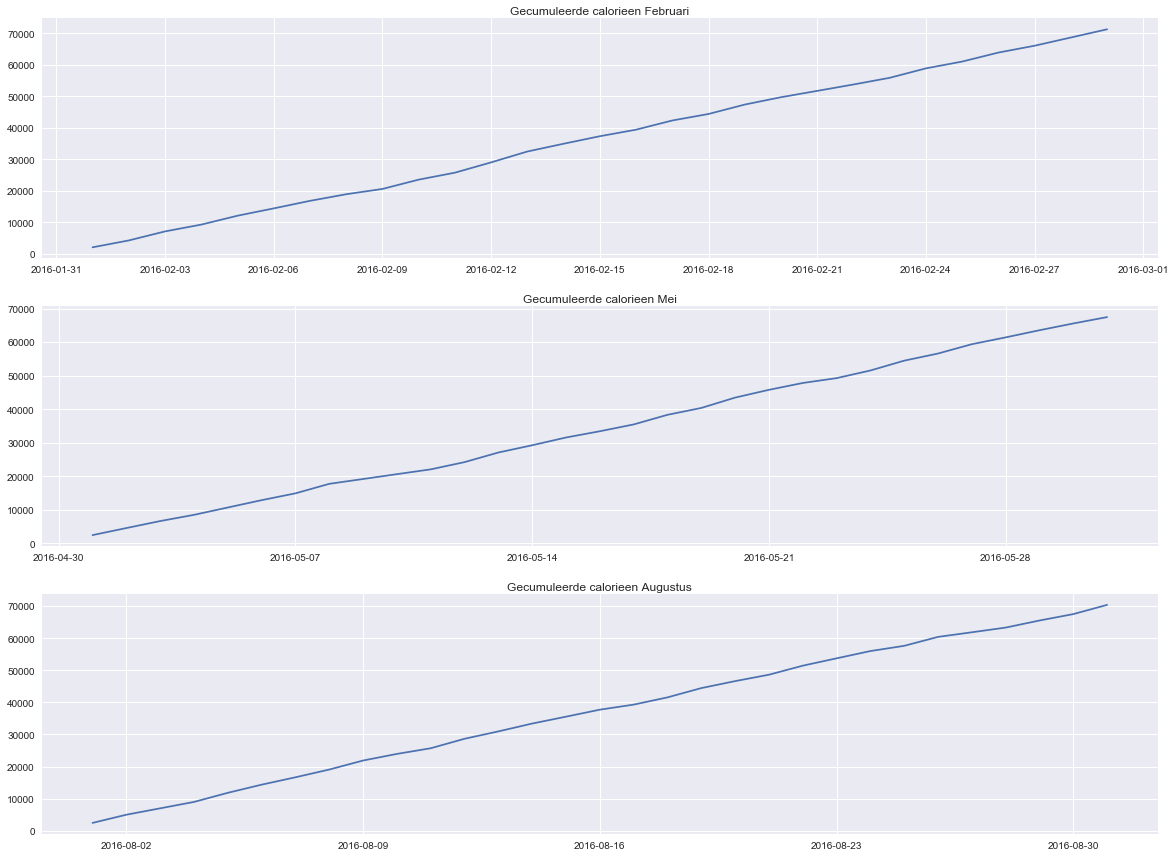

In [28]:
### maak er een plot van.
stepsPlots = pl.figure(figsize=(20,15))

pl.subplot(3,1,1)
pl.plot(cumsum_feb['datum'],cumsum_feb['cumsum'])
pl.title('Gecumuleerde calorieen Februari')

pl.subplot(3,1,2)
pl.plot(cumsum_mei['datum'],cumsum_mei['cumsum'])
pl.title('Gecumuleerde calorieen Mei')

pl.subplot(3,1,3)
pl.plot(cumsum_aug['datum'],cumsum_aug['cumsum'])
pl.title('Gecumuleerde calorieen Augustus')

pl.show()

De grafieken vertonen veel overeenkomst. Inclusief de afvlakking in de tweede week.

# Deelopdracht 5: 
Bekijk met behulp van een scatterplot of er een relatie is tussen resultaten van opeenvolgende dagen. Let er daarbij op dat voor het aftrekken van dataframes of series geldt dat de indices bepalend zijn. Voor het verschil tussen dag a en dag a+1 moeten de indices van de laatste serie dus worden aangepast. 

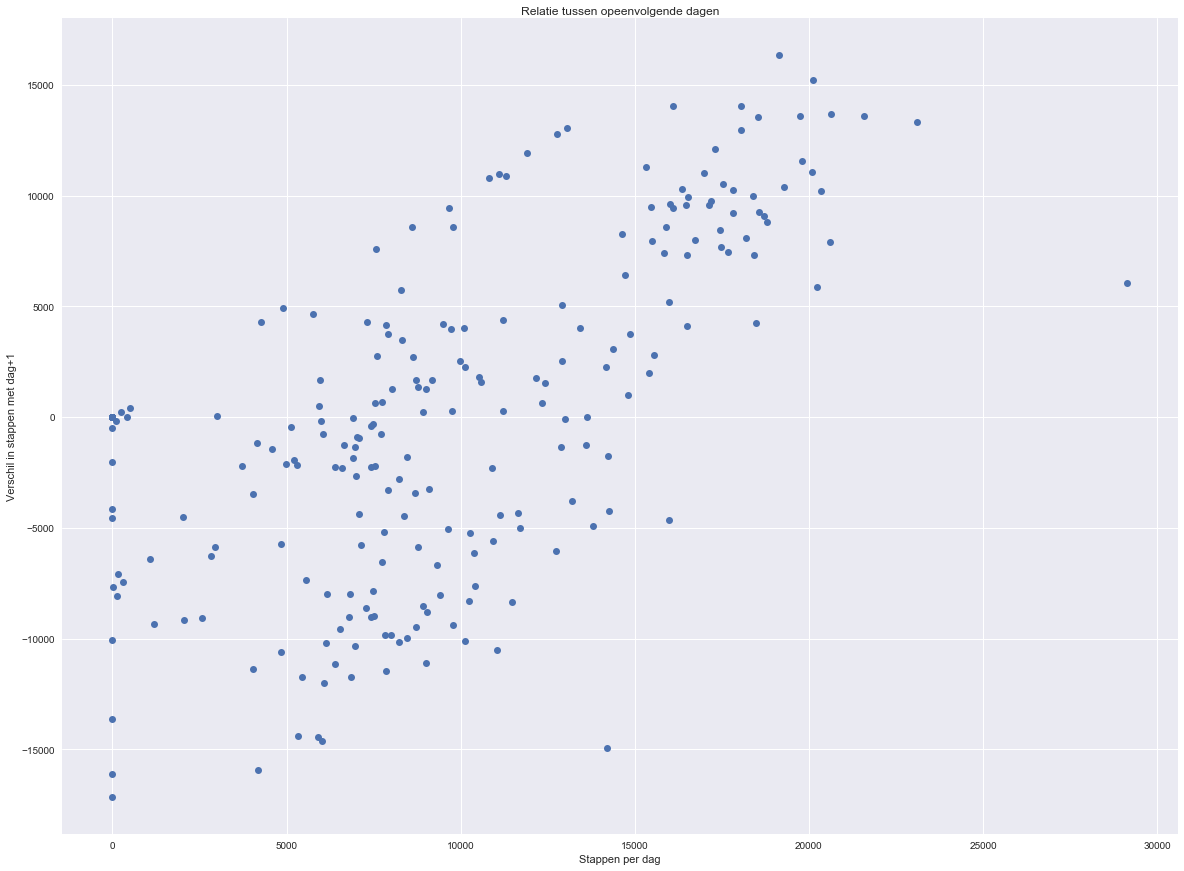

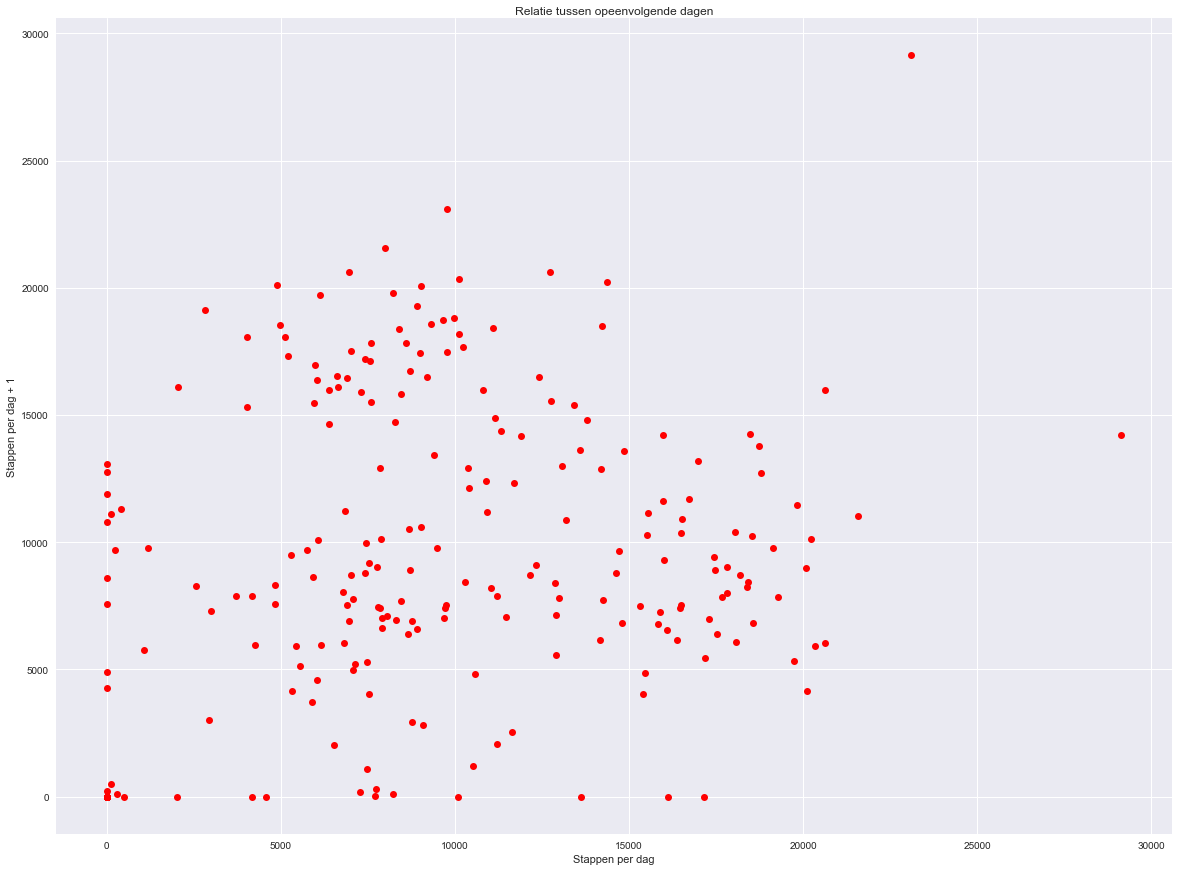

In [29]:
### Bereken het verschil tussen dag en dag+1
verschil=[dag_mets_df.iloc[idx+1]['M_STEPS']-dag_mets_df.iloc[idx]['M_STEPS'] for idx in range(len(dag_mets_df)-1)]
verschil.insert(0,0)
dag_mets_df['verschil']=verschil

### Maak nieuw Dataframe en verschuif M_STEPS 1 naar boven, 
### zodat je in een scatterplot dag en dag+1 tegen elkaar kan uitzetten
dag_df=dag_mets_df.copy()
dag_df.M_STEPS=dag_df.M_STEPS.shift(-1)


### maak er een plot van.

### Plot tussen aantal stappen en het verschil tussen dag en dag+1
verschilPlots = pl.figure(figsize=(20,15))
pl.plot(dag_mets_df['M_STEPS'] ,verschil,'o')
pl.title('Relatie tussen opeenvolgende dagen')
pl.xlabel("Stappen per dag")
pl.ylabel("Verschil in stappen met dag+1")

### Plot van dag tegen dag+1
stepsPlots = pl.figure(figsize=(20,15))
pl.plot(dag_mets_df['M_STEPS'] ,dag_df['M_STEPS'],'ro')
pl.title('Relatie tussen opeenvolgende dagen')
pl.xlabel("Stappen per dag")
pl.ylabel("Stappen per dag + 1")
pl.show()




# Deelopdracht 6: 
Er zou kunnen gelden dat als op een dag meer gelopen is, dat de volgende dag dan rustiger aan wordt gedaan. In dat geval zal het verschil, zoals bepaald bij 5, alternerend positief en negatief zijn. Het product van die verschillen op opeenvolgende dagen is dan ook negatief. Bepaal dit product voor alle dagen en toon de verdeling van het resultaat als histogram. Kies een aantal bins dat een mooie verdeling toont en beschrijf in het notebook wat de grafiek laat zien en welke conclusie getrokken kan worden.

In [30]:
### Bereken het product van het verschil tussen dag en dag+1
product=[dag_mets_df.iloc[idx+1]['verschil']*dag_mets_df.iloc[idx]['verschil'] for idx in range(len(dag_mets_df)-1)]

### Zorgen dat lijst dezelfde lengte heeft als het Dataframe door eerste waarde op nul te zetten.
product.insert(0,0)
dag_mets_df['product']=product


In [31]:
dag_mets_df.describe()

,M_STEPS,weekdag,verschil,product
count,230.000000,230.000000,230.000000,2.300000e+02
mean,9632.808696,2.991304,-1.030435,-2.744406e+07
std,5922.269856,2.004343,7549.308186,5.682180e+07
min,0.000000,0.000000,-17141.000000,-2.429301e+08
25%,6035.250000,1.000000,-5764.000000,-5.506763e+07
50%,8776.500000,3.000000,0.000000,-5.804891e+06
75%,14217.750000,5.000000,5596.500000,1.647158e+06
max,29133.000000,6.000000,16327.000000,8.048904e+07


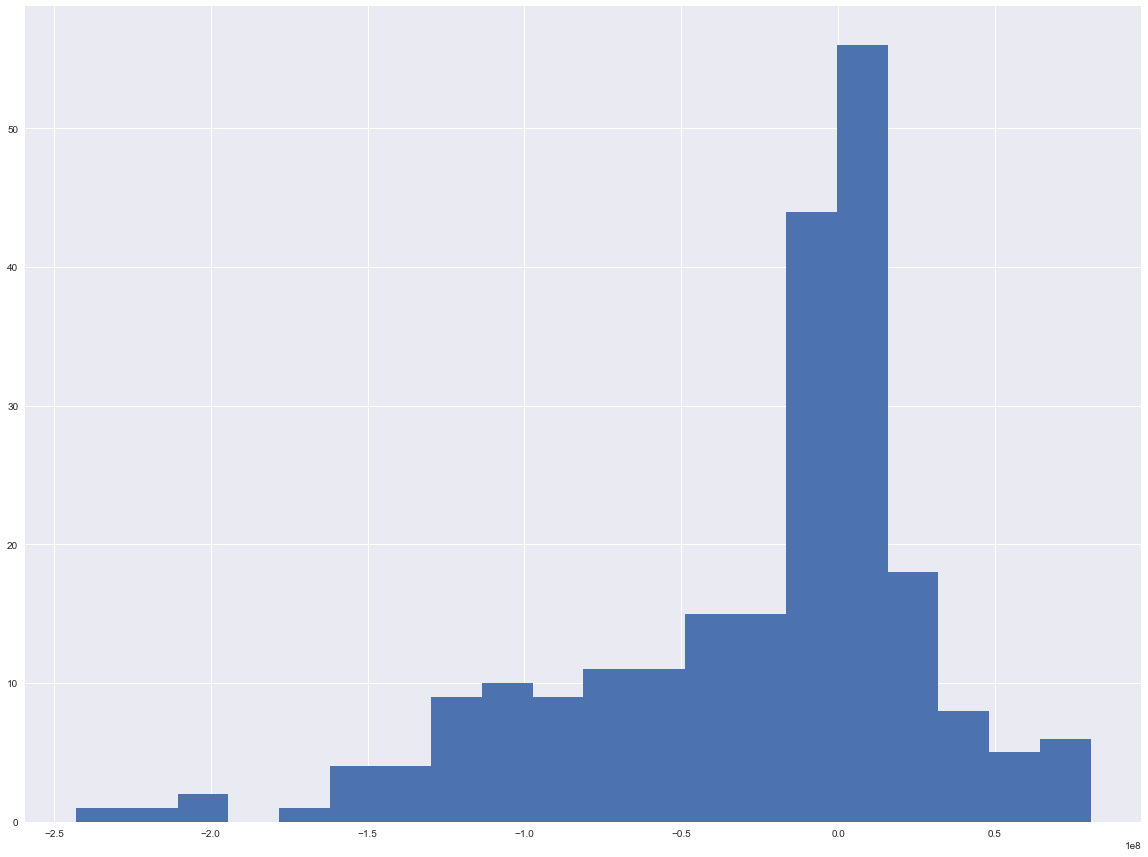

In [33]:
stepsPlots = pl.figure(figsize=(20,15))
pl.hist(dag_mets_df['product'],bins=20)

pl.show()

## Waarneming
* Groot aantal dagen waarop niet gelopen/gemeten is.
* Bandbreedte negatieve producten veel breder dan positieve producten. Dus voornamelijk een alternerend gedrag.
* Voor de dagen met positief product betekent dat minstens twee dagen achter elkaar hetzelfde gedrag wordt vertoond.


